# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data  or soccer matches, players, and teams from several European countries from 2008 to 2016. 
The Dataset contains :
   
   - Over 25,000 matches
   - More than 10,000 players
   - 11 European Countries with their lead championship
   - Seasons 2008 to 2016
   - Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
   - Team line up with squad formation (X, Y coordinates)
   - Betting odds from up to 10 providers
   - Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

The original dataset can be found at the [Kaggle](https://www.kaggle.com/hugomathien/soccer) website.


__Disclaimer: The data set provided is solely for non commercial use__

__*References:*__

- (https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e)
- (https://pypi.org/project/pandasql/)
- (https://www.analyticsvidhya.com/blog/2021/07/pandasql-best-way-to-run-sql-queries-and-codes-in-jupyter-notebook-using-python/)


#### Dataset Structure

__*Tables:*__

The dataset was provided by Kaggle in an sqlite format and the tables : 

- Country
- League
- Match
- Player
- Player Attributes
- Team
- Team attributes 

These tables were all exported into csv using ['DB Browser for SQLite'](https://sqlitebrowser.org/) 
 
For the purposes of this analysis 4 tables are of interest :
* __Match__
* __League__
* __Team__
* __Team Attributes__


### Question(s) for Analysis

During this analysis, the following questions will be explored :

1. Is a team more likely to win a home or an away game?

Understand if the location of the game impacts the outcome of the match
   
2. Which league had the most goals and during which season?

Explore the top scoring league and understand if the top league teams have above average attributes
    
3. What are the attributes of the above average teams and list them ?

Identify the attributes of the top teams and further understand if any of the top league teams fall within the criteria
   



> Importing Required Libraries and Packages to carry out the analysis


#### Import and load required libraries and packages to carry out the analysis

In [226]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
from pandasql import sqldf
%matplotlib inline

#### Read files of interest and load into dataframes

In [227]:
df_match = pd.read_csv('Match.csv')
df_league = pd.read_csv('League.csv')
df_team = pd.read_csv('Team.csv')
df_team_att = pd.read_csv('Team_Attributes.csv')

#### Exploring table attributes and properties

In [228]:
df_match.shape, df_league.shape, df_team.shape, df_team_att.shape

((25979, 115), (11, 3), (299, 5), (1458, 25))

In [229]:
df_match.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

In [230]:
df_league.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [231]:
df_team.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

In [232]:
df_team_att.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

In [233]:
df_team_att.isna().sum().max()

969

<a id='wrangling'></a>
## Data Wrangling
#### Exploring the datasets

In [234]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


> Check for duplicates and null values

In [235]:
df_match.isna().sum().max()

14811

In [236]:
df_match.duplicated().sum()

0

In [237]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


> Check for duplicates and null values

In [238]:
df_league.isna().sum().max()

0

In [239]:
df_league.duplicated().sum()

0

In [240]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


> Check for duplicates and null values

In [241]:
df_team.isna().sum().max()

11

In [242]:
df_team.duplicated().sum()

0

In [243]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


> Check for duplicates and null values

In [244]:
df_team_att.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [245]:
df_team_att.duplicated().sum()

0


### Data Cleaning


The data looks to be reasonably clean and consistent. Columns not required for this analysis will be dropped (eg. betting and description columns in the match data frame, api id, etc .. )

Null and duplicated columns are expected to be dropped during this stage but the impact and treatment will be decided as this step progresses post dropping the columns that will not be used for the analysis


##### Cleaning Match Table

> Columns identified to be dropped from the match table :

|               |               |               |               |               |
|:--------------|:--------------|:--------------|:--------------|:--------------|
|home_player_X1	|home_player_X2	|home_player_X3	|home_player_X4	|home_player_X5	|
|home_player_X6	|home_player_X7	|home_player_X8	|home_player_X9	|home_player_X10|	
|home_player_X11|away_player_X1	|away_player_X2	|away_player_X3	|away_player_X4 |	
|away_player_X5	|away_player_X6	|away_player_X7	|away_player_X8	|away_player_X9	|
|away_player_X10|away_player_X11|home_player_Y1	|home_player_Y2	|home_player_Y3	|
|home_player_Y4	|home_player_Y5	|home_player_Y6	|home_player_Y7	|home_player_Y8	|
|home_player_Y9	|home_player_Y10|home_player_Y11|away_player_Y1	|away_player_Y2 |
|away_player_Y3	|away_player_Y4	|away_player_Y5	|away_player_Y6	|away_player_Y7	|
|away_player_Y8	|away_player_Y9	|away_player_Y10|away_player_Y11|home_player_1	|
|home_player_2	|home_player_3	|home_player_4	|home_player_5	|home_player_6	|
|home_player_7  |home_player_8	|home_player_9	|home_player_10	|home_player_11	|
|away_player_1  |away_player_2	|away_player_3	|away_player_4	|away_player_5	|
|away_player_6  |away_player_7  |away_player_8	|away_player_9	|away_player_10	|
|away_player_11	|goal           |shoton	        |shotoff	    |foulcommit	    |
|card	        |cross          |corner	        |possession	    |B365H	        |
|B365D          |B365A          |BWH	        |BWD	        |BWA            |	
|IWH            |IWD            |IWA            |LBH            |LBD            |	
|LBA            |PSH	        |PSD            |PSA            |WHH            |
|WHD            |WHA            |SJH	        |SJD	        |SJA            |	
|VCH            |VCD            |VCA            |GBH	        |GBD	        |
|GBA            |BSH            |BSD            |BSA            |               |


These columns include player locations, match statistics and betting info as researched on the Kaggle website and the provided references.

In [246]:
df_match.drop(['home_player_X1','home_player_X2','home_player_X3','home_player_X4',
               'home_player_X5','home_player_X6','home_player_X7','home_player_X8',
               'home_player_X9','home_player_X10','home_player_X11','away_player_X1',
               'away_player_X2','away_player_X3','away_player_X4','away_player_X5',
               'away_player_X6','away_player_X7','away_player_X8','away_player_X9',
               'away_player_X10','away_player_X11','home_player_Y1','home_player_Y2',
               'home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6',
               'home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10',
               'home_player_Y11','away_player_Y1','away_player_Y2','away_player_Y3',
               'away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7',
               'away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11',
               'home_player_1','home_player_2','home_player_3','home_player_4',
               'home_player_5','home_player_6','home_player_7','home_player_8',
               'home_player_9','home_player_10','home_player_11','away_player_1',
               'away_player_2','away_player_3','away_player_4','away_player_5',
               'away_player_6','away_player_7','away_player_8','away_player_9',
               'away_player_10','away_player_11','goal','shoton','shotoff','foulcommit',
               'card','cross','corner','possession','B365H','B365D','B365A','BWH','BWD',
               'BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD',
               'WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'
], axis = 1, inplace = True)

>Check Changes

In [247]:
df_match.shape

(25979, 11)

In [248]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [249]:
df_match.duplicated().sum()

0

In [250]:
df_match.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

##### Cleaning League Table

The League table does not require any cleaning

##### Cleaning Team Table

As observed from the initial check , the team table seems to be clean with the exception of a few missing records.

In [251]:
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

The team_fifa_api_id is irrelevant for our current analysis and is dropped

In [252]:
df_team.drop(['team_fifa_api_id'], axis = 1, inplace =True)

> Confirm Changes

In [253]:
df_team.isna().sum()

id                 0
team_api_id        0
team_long_name     0
team_short_name    0
dtype: int64

##### Cleaning Team Attributes Table

In [254]:
df_team_att_old = df_team_att.copy() #Keep a copy of the original dataframe to assess the impact of the dropped columns

df_team_att.isna().any(axis=1).sum()

969

In [255]:
df_team_att.duplicated().sum()

0

As observed, the player attributes table contains 969 rows with missing values all in the buildUpPlayDribbling column. This feature will be excluded from the analysis and the column will be dropped

In [256]:
df_team_att.drop(['buildUpPlayDribbling'], axis = 1, inplace =True)

> Confirm Changes

In [257]:
df_team_att.isna().any(axis=1).sum()

0

In [258]:
df_team_att.shape

(1458, 24)

### Research Question 1  - Is a team more likely to win a home or an away game?

> Refer to the match table as the reference for match statistics

In [259]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


> Update Match dataframe with result winner tag (Home, Away, Tie)

In [260]:
df = df_match
df['result'] = df.apply(lambda x: 'Home' if x['home_team_goal'] > x['away_team_goal'] 
               else ('Away' if x['away_team_goal'] > x['home_team_goal']  else 'Tie'), axis=1)

> Plot results

,count,unique,top,freq
result,,,,
Away,7466,1,Away,7466
Home,11917,1,Home,11917
Tie,6596,1,Tie,6596


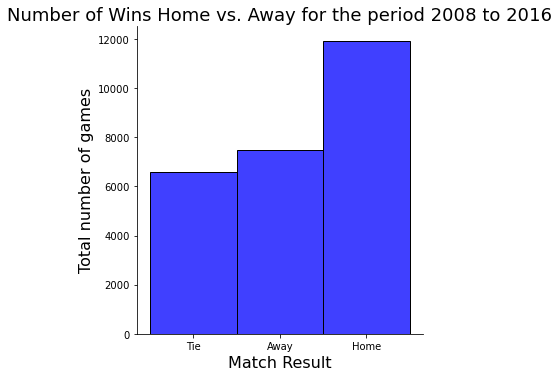

In [261]:
sns.displot(df['result'], kde=False, color='blue');
plt.title('Number of Wins Home vs. Away for the period 2008 to 2016', fontsize=18);
plt.xlabel('Match Result', fontsize=16);
plt.ylabel('Total number of games', fontsize=16);
pd.DataFrame(df['result'].groupby(df['result']).describe())

As observed from the above histogram, the home team has a higher probability of winning with 11917 games won during a home game vs. 7466 games won while playing away this can be quantified into percentages as below.

In [262]:
(df.groupby(['result']).size()/df.groupby(['result']).size().sum())*100

result
Away    28.738597
Home    45.871666
Tie     25.389738
dtype: float64

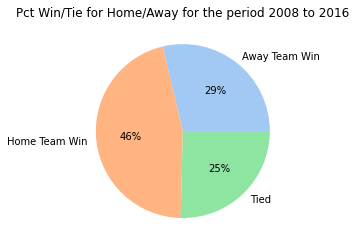

In [263]:
#Plotting the results in a Pie Chart for better representation

#Define Data
data = list((df.groupby(['result']).size()/df.groupby(['result']).size().sum())*100)
labels = ['Away Team Win', 'Home Team Win', 'Tied']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Pct Win/Tie for Home/Away for the period 2008 to 2016')
plt.show()

From the above chart it is observed that 75% of the played games end with a win

### Research Question 2  - Which league had the most goals and during which season?

In [264]:
#In order to carry out this analysis, it was easier to use pandas sql

mysql = lambda q: sqldf(q, globals())


In [265]:
df_season = mysql("Select df_match.season,sum(df_match.home_team_goal + df_match.away_team_goal) as season_goals,\
                    name\
                    From df_match, df_league\
                    where df_match.league_id = df_league.id\
                    group by season,league_id;")

#Checking for the league with most goals

df_season.loc[df_season['season_goals'] == df_season['season_goals'].max()]

,season,season_goals,name
9,2008/2009,1101,Spain LIGA BBVA


The Spanish League during the 2008/2009 season had the most goals scored across all the seasons available within the data set

In [266]:
#Check to confirm findings

df_season.describe()

,season_goals
count,88.000000
mean,798.715909
std,213.757245
min,30.000000
25%,600.500000
50%,868.000000
75%,978.250000
max,1101.000000


,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Belgium Jupiler League,8.0,605.125,246.262019,30.0,617.50,679.5,696.25,855.0
England Premier League,8.0,1030.000,46.708824,942.0,1013.25,1052.5,1063.00,1066.0
France Ligue 1,8.0,928.375,38.176049,858.0,909.50,940.0,957.00,967.0
Germany 1. Bundesliga,8.0,887.875,36.984311,843.0,866.00,884.5,895.00,967.0
Italy Serie A,8.0,986.875,34.803274,925.0,973.00,990.0,1006.75,1035.0
Netherlands Eredivisie,8.0,942.750,46.918623,870.0,907.00,953.0,980.25,997.0
Poland Ekstraklasa,8.0,582.000,48.975212,524.0,530.75,588.0,629.50,635.0
Portugal Liga ZON Sagres,8.0,650.125,99.280897,552.0,580.25,617.5,691.00,831.0
Scotland Premier League,8.0,600.500,31.753515,548.0,584.75,594.0,623.75,650.0


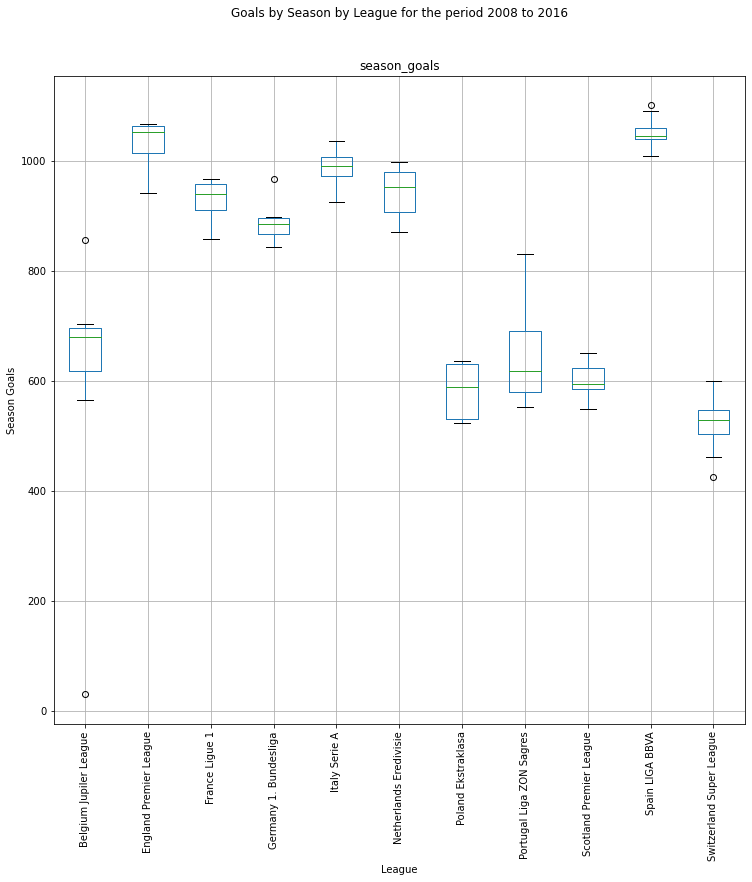

In [267]:
#Visualize complete data set seasonal performance by league

df_season.boxplot(column=['season_goals'],by=['name'],figsize=(12,12), rot=90);
plt.suptitle("Goals by Season by League for the period 2008 to 2016");
plt.xlabel("League");
plt.ylabel("Season Goals");

pd.DataFrame(df_season['season_goals'].groupby(df_season['name']).describe())

The above confirms that the Spanish League has consistently had better performance during the study period

### Research Question 3  - What are the attributes of the above average teams and list them ?

In [268]:
# Explore table to identify attributes of interest

df_team_att.describe()
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [269]:
#Identify Winning Teams

df_home_win = mysql('Select home_team_api_id as team, home_team_goal as goals from df_match Where result="Home";')
df_away_win = mysql('Select away_team_api_id as team, away_team_goal as goals from df_match Where result="Away";')
df_home_win.shape, df_away_win.shape

((11917, 2), (7466, 2))

In [270]:
df_win = df_home_win.append(df_away_win)
df_win.shape

(19383, 2)

In [271]:
#Aggregate Match Data

df_win = mysql('Select team as team_api_id, count(team) as match_count, sum(goals) as total_goals from df_win group by team;')
df_win['goals_per_game'] = df_win['total_goals'] / df_win['match_count']
df_win.shape

(299, 4)

In [272]:
df_win.head()

,team_api_id,match_count,total_goals,goals_per_game
0,1601,92,193,2.097826
1,1773,22,61,2.772727
2,1957,87,186,2.137931
3,2033,32,55,1.718750
4,2182,124,298,2.403226


In [273]:
df_win.describe()

,team_api_id,match_count,total_goals,goals_per_game
count,299.000000,299.000000,299.000000,299.000000
mean,12340.521739,64.826087,154.856187,2.234545
std,25940.411135,51.802767,141.560536,0.317048
min,1601.000000,3.000000,4.000000,1.333333
25%,8349.000000,20.000000,39.000000,2.037169
50%,8655.000000,56.000000,118.000000,2.210526
75%,9886.500000,97.500000,227.500000,2.411011
max,274581.000000,234.000000,779.000000,3.403509


In [274]:
df_win_test = df_win.copy() #maintain a copy to assess impact of dropped column

In [275]:
#Aggregate Team Attributes and use mean value of statistics

df_team_stat = mysql('Select team_api_id,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),\
                        AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),\
                        AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth)\
                        from df_team_att\
                        group by team_api_id;')

#Calculate the mean statistics for the full data set

df_mean_stat = mysql('Select AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),\
                        AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),\
                        AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth)\
                        from df_team_att;')
df_team_stat.shape, df_mean_stat.shape

((288, 9), (1, 8))

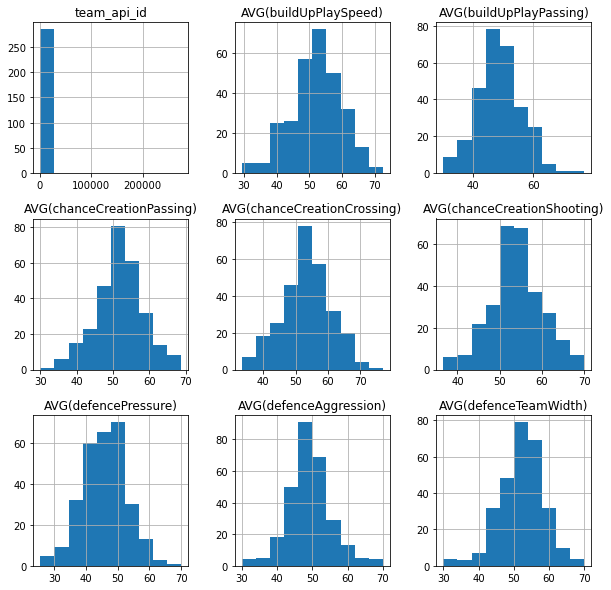

In [276]:
#Visualize the mean team statistics

df_team_stat.hist(figsize=(10,10));

The team attributes seem to have a normal distribution

In [277]:
df_team.head()

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB


In [278]:
#Append team mean performance to match win data
df_win = pd.merge(df_win ,df_team_stat ,on=['team_api_id','team_api_id'], how='left')
df_win.head()

,team_api_id,match_count,total_goals,goals_per_game,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth)
0,1601,92,193,2.097826,47.333333,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333
1,1773,22,61,2.772727,52.000000,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000
2,1957,87,186,2.137931,47.166667,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667
3,2033,32,55,1.718750,49.000000,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000
4,2182,124,298,2.403226,60.333333,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000


In [279]:
#Append team name for easier understanding

df_win = df_win.merge(df_team, on=['team_api_id','team_api_id'], how='left')

#drop id, team_short name

df_win.drop(['id', 'team_short_name'], axis=1, inplace=True)

In [280]:
df_win.head()

,team_api_id,match_count,total_goals,goals_per_game,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth),team_long_name
0,1601,92,193,2.097826,47.333333,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333,Ruch Chorzów
1,1773,22,61,2.772727,52.000000,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000,Oud-Heverlee Leuven
2,1957,87,186,2.137931,47.166667,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667,Jagiellonia Białystok
3,2033,32,55,1.718750,49.000000,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000,S.C. Olhanense
4,2182,124,298,2.403226,60.333333,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000,Lech Poznań


In [281]:
df_win.shape

(299, 13)

In [282]:
df_top = df_win.loc[(df_win['AVG(buildUpPlaySpeed)']>52.462277)\
           & (df_win['AVG(buildUpPlayPassing)']>48.490398)\
           & (df_win['AVG(chanceCreationPassing)']>52.165295)\
           & (df_win['AVG(chanceCreationCrossing)']>53.731824)\
           & (df_win['AVG(chanceCreationShooting)']>53.969136)\
           & (df_win['AVG(defencePressure)']>46.017147)\
           & (df_win['AVG(defenceAggression)']>49.251029)\
           & (df_win['AVG(defenceTeamWidth)']>52.185871)]
          

In [283]:
#List stats for top teams
df = df_top['team_long_name']

In [284]:
df

86      Hamilton Academical FC
132                    Falkirk
135    Wolverhampton Wanderers
206           Grenoble Foot 38
209        Heart of Midlothian
233                     Celtic
242          Standard de Liège
Name: team_long_name, dtype: object

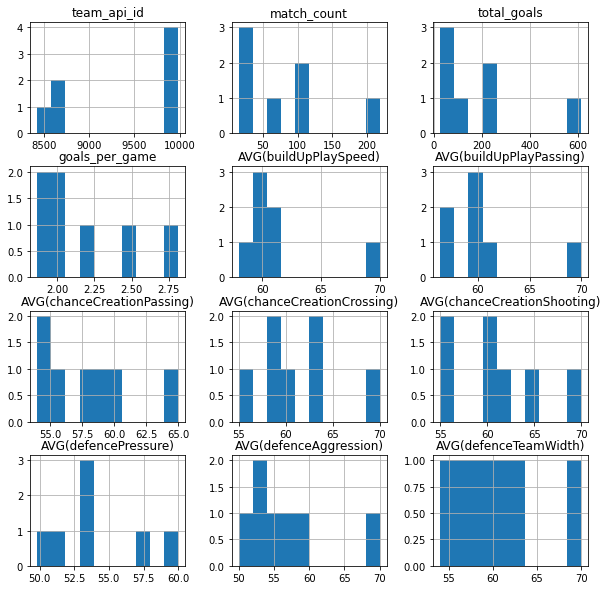

In [285]:
#Visuals for Top Performing Teams

df_top.hist(figsize=(10,10));

Top performing team attributes seem to be in general skewed to the right

Test Impact of Build Up Play Dribbling Column

In [286]:
df_team_att_old.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [287]:
#Aggregate Team Attributes and use mean value of statistics including dropped column

df_team_stat_test = mysql('Select team_api_id,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),\
                        AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),\
                        AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth), AVG(buildUpPlayDribbling)\
                        from df_team_att_old\
                        group by team_api_id;')

#Calculate the mean statistics for the full data set including dropped column

df_mean_stat_test = mysql('Select AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),\
                        AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),\
                        AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth),AVG(buildUpPlayDribbling)\
                        from df_team_att_old;')
df_team_stat_test.shape, df_mean_stat_test.shape

((288, 10), (1, 9))

In [288]:
#Append team name for easier understanding

df_win_test = df_win_test.merge(df_team, on=['team_api_id','team_api_id'], how='left')


#Sanity Check
df_win_test.head() 

,team_api_id,match_count,total_goals,goals_per_game,id,team_long_name,team_short_name
0,1601,92,193,2.097826,31446,Ruch Chorzów,CHO
1,1773,22,61,2.772727,1513,Oud-Heverlee Leuven,O-H
2,1957,87,186,2.137931,31456,Jagiellonia Białystok,BIA
3,2033,32,55,1.718750,35774,S.C. Olhanense,OLH
4,2182,124,298,2.403226,31453,Lech Poznań,POZ


In [289]:
#drop id, team_short name
df_win_test.drop(['id', 'team_short_name'], axis=1, inplace=True)

In [290]:
df_win_test.head()

,team_api_id,match_count,total_goals,goals_per_game,team_long_name
0,1601,92,193,2.097826,Ruch Chorzów
1,1773,22,61,2.772727,Oud-Heverlee Leuven
2,1957,87,186,2.137931,Jagiellonia Białystok
3,2033,32,55,1.718750,S.C. Olhanense
4,2182,124,298,2.403226,Lech Poznań


In [291]:
#Append team mean performance to match win data
df_win_test = pd.merge(df_win_test ,df_team_stat_test ,on=['team_api_id','team_api_id'], how='left')
df_win_test.head()

,team_api_id,match_count,total_goals,goals_per_game,team_long_name,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth),AVG(buildUpPlayDribbling)
0,1601,92,193,2.097826,Ruch Chorzów,47.333333,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333,48.0
1,1773,22,61,2.772727,Oud-Heverlee Leuven,52.000000,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000,51.0
2,1957,87,186,2.137931,Jagiellonia Białystok,47.166667,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667,54.0
3,2033,32,55,1.718750,S.C. Olhanense,49.000000,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000,62.0
4,2182,124,298,2.403226,Lech Poznań,60.333333,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000,52.5


In [292]:
df_mean_stat_test #Display Mean Stats with Dropped Column

,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth),AVG(buildUpPlayDribbling)
0,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871,48.607362


In [293]:
df_top_test = df_win_test.loc[(df_win_test['AVG(buildUpPlaySpeed)']>52.462277)\
           & (df_win_test['AVG(buildUpPlayPassing)']>48.490398)\
           & (df_win_test['AVG(chanceCreationPassing)']>52.165295)\
           & (df_win_test['AVG(chanceCreationCrossing)']>53.731824)\
           & (df_win_test['AVG(chanceCreationShooting)']>53.969136)\
           & (df_win_test['AVG(defencePressure)']>46.017147)\
           & (df_win_test['AVG(defenceAggression)']>49.251029)\
           & (df_win_test['AVG(defenceTeamWidth)']>52.185871)\
           & (df_win_test['AVG(buildUpPlayDribbling)']>48.607362)]

In [294]:
df_top_test

,team_api_id,match_count,total_goals,goals_per_game,team_long_name,AVG(buildUpPlaySpeed),AVG(buildUpPlayPassing),AVG(chanceCreationPassing),AVG(chanceCreationCrossing),AVG(chanceCreationShooting),AVG(defencePressure),AVG(defenceAggression),AVG(defenceTeamWidth),AVG(buildUpPlayDribbling)
209,9860,101,219,2.168317,Heart of Midlothian,59.600000,60.000000,58.400000,63.800000,64.000000,53.400000,59.000000,61.400000,51.0
233,9925,218,613,2.811927,Celtic,61.333333,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,50.5


It is observed that adding the buildUpPlayDribbling column reduces the number of above average performing teams to 2

## Limitations

This analysis is limited to the available dataset and excludes any effect from the columns that were dropped from the analysis.

The scores, lineup, team formation and events source data at http://football-data.mx-api.enetscores.com was not accessible as the site was not functioning.

The players and teams attributes from EA Sports FIFA games at http://sofifa.com/ was mapped, however the impact of the attribute classes was not considered in this analysis.

The betting attributes and impact on performance were not assesed during this analysis.

With only 969 entries for buildUpPlayDribbling column missing in the list from a total of 1458 (66% of the dataset missing) the effect of the attribute could not be properly assessed.

<a id='conclusions'></a>

## Conclusions

- A team is more likely to win a home game than an away team (46% vs. 29%)
- The Spanish league had the most scored goals in the 2008/2009 season
- Teams with above average stats were assumed to be, based on personal bias, one of the mainstream teams from within the popular leagues, but the analysis displayed a totally unexpected set of teams, despite that most team statistics are normally distributed
- Winning teams score an average 2.2 goals per game
- There is a 75 % propability that a game will end with a win with only a 25% of a draw. 
- 5 teams appear to have above average stats when excluding the buildUpPlayDribbling while only 2 from the original list are included when the buildUpPlayDribbling column is included, the impact of the attribute could not be properly quantified. The impact is 60% on the identified teams and hence is dropped from the assesment as the 66% missing values could not be extrapolated from the current data sample.
- The above average teams in terms of performance are :
    * 86      Hamilton Academical FC
    * 132                    Falkirk
    * 135    Wolverhampton Wanderers
    * 206           Grenoble Foot 38
    * 209        Heart of Midlothian
    * 233                     Celtic
    * 242          Standard de Liège



